***SENTIMENT ANALYSIS OF (Kindle Fire 16gb 7 Ips Display Tablet) Using TextBlob***





This project leverages the TextBlob library to evaluate customer opinions on the "Kindle Fire 16gb 7 Ips Display Tablet" from Amazon reviews. The dataset spans 21 columns, detailing product information, user feedback and ratings, to classify sentiments as positive, neutral, or negative, thereby aiding in assessing customer satisfaction and guiding product and marketing improvements.

In [ ]:
%pip install pandas
%pip install textblob
%pip install matplotlib

**Import Important Libraries**

In [47]:
import pandas as pd
import matplotlib as plt
from textblob import TextBlob


In [48]:
def sentimentAnalyzer(text):

    blob = TextBlob(text)


    score = blob.sentiment.polarity


    if score < -0.2:
        return 'Negative'
    elif score > 0.2:
        return 'Positive'
    else:
        return 'Neutral'

Loading the dataset

In [50]:
import pandas as pd
df = pd.read_csv('data.csv')

C:\Users\جود\AppData\Local\Temp\ipykernel_23916\836886925.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


Explore the dataset

In [76]:
df.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [51]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


**Filtter the data to find the products that have at least 1000 reviws**

In [33]:
counts=df['name'].value_counts()
products_with_more_than_1000 = counts[counts >= 1000].index.tolist()
products_with_more_than_1000

['Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
 'Echo (White),,,\r\nEcho (White),,,',
 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
 'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,',
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,']

In [59]:
df.columns()

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [60]:
#choose a product name
product_df = df[df['name'] == 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,']

product_df = product_df[['id', 'name', 'brand', 'categories', 'manufacturer',
        'reviews.dateAdded', 
        'reviews.id',
       'reviews.rating',
       'reviews.text', 'reviews.title', 
        'reviews.username']]
#Number of rows
rows=product_df.shape[0]

#Number of columns
col=product_df.shape[1]

#Length of the shortest review, length of the longest review, and the average length of the review.
review_lengths = product_df['reviews.text'].str.len()
shortest_review = review_lengths.min()
longest_review = review_lengths.max()
average_length = review_lengths.mean()
print("Number of rows for the chosen product: ", rows)
print ('Shortest Review length: ', shortest_review)
print ('longest Review length: ', longest_review)
print ('average Review length: ', average_length)


Number of rows for the chosen product:  1038
Shortest Review length:  50
longest Review length:  1754
average Review length:  142.60211946050097


**Applying Sentiment Analysis on the Reviews of our product**

In [61]:
product_df['Sentiment'] = product_df['reviews.text'].apply(sentimentAnalyzer)

**Visulizing results**

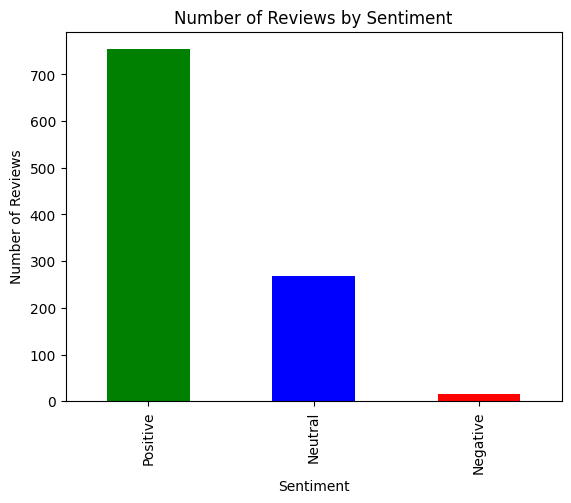

In [62]:
import matplotlib.pyplot as plt


sentiment_counts = product_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Number of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

**Observations:**

The sentiment analysis graph reveals a majority of positive reviews , with fewer neutral and minimal negative feedback, indicating overall customer satisfaction with the product. This distribution suggests the product is well-received, although further analysis could reveal more about the specific customer sentiments

In [74]:
# Filter out the reviews based on thier sentement  to grasp  insights
negative_reviews = product_df[product_df['Sentiment'] == 'Negative']
positive_reviews = product_df[product_df['Sentiment'] == 'Positive']
neutral_review = product_df[product_df['Sentiment'] == 'Neutral']

positive_reviews[['reviews.text']].head()



,reviews.text
14488,The best value for the money hands down. Works perfectly.
14490,I have bought several Kindle Fire's over the years. I think they are great for streaming movies & videos. You can downloaded movies on the device and use it while off wi-fi.
14492,I actually bought this for a friend. I already have one. She loves to read and I thought this would be perfect for her to download books on. She absolutely loves it for that plus all the other features she can do on her tablet. Such a great buy!
14494,It's nice and simple. Easy to carry around. If you have children its not bad when traveling
14495,"The Fire tablet is such a great value. If money is no consideration, there are better tablets out there, but for the money, this is a great choice, especially if you're a Prime member."


In [75]:
negative_reviews[['reviews.text']].head()

,reviews.text
14493,Small amd neat. Everything you need on this little device.
14542,There's some fields I've notice that could use a power boost. I've been using it for about a month now and it gets slow at some points but for $40 I shouldn't complain
14602,"I wouldn't buy again, had trouble w/shutting off all the time, we would have it reset back to the factory reset status and it would lock up and freeze, actually replaced with second thinking that was just a bad one however sad to report same problems. Not a favorite purchase."
14744,Too slow for games and videos i bought it for my youngest son so they wouldnt fight for the ipad but they still do
14820,My first tablet was a Kindle. I was curious about the updated version. Very disappointed


Now, let us find the reviews that was classified incorrectly using the rating column.

In [71]:
mismatch_positive = product_df[(product_df['reviews.rating'] <= 2) & (product_df['Sentiment'] == 'Positive')]
mismatch_negative = product_df[(product_df['reviews.rating'] >= 4) & (product_df['Sentiment'] == 'Negative')]


mismatch_positive[['reviews.text']].head()

,reviews.text
14537,Bought this for my daughter and she didn't care for it when it came to the apps. Works great for reading.
14623,Use it a lot for listening to audio books. Too many ads.
14780,The protector was not made for the Fire 7 as it was to large and had no directions that were coherent. Worse purchase from Best Buy ever.
14910,Wasnt really impressed with the operating system. Was hoping it was more of android style. Not so much.
15438,Amazon fire is a good tablet if you like e-books. It's also nice to get a six-month subscription to the Washington Post. Their claim to have 16 gigabytes of storage is misleading because it only gives you 5 and then they want to charge you the same amount of money that you paid for the tablet for unlimited storage. Another problem is that you can't flag something as being inappropriate like you can on Samsung Galaxy tablets.


**Observations:**

TextBlob's sentiment analysis may incorrectly label reviews as positive by focusing on word polarity and missing context, such as a review praising a product's feature but criticizing its ads, or subtly expressing disappointment without strong negative language, highlighting the challenges of detecting mixed emotions or subtle critiques in sentiment analysis.

In [26]:
product_df.to_csv('sentiment_analysis.csv')